In [31]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [32]:
df=pd.read_csv('D:\\study\\teachnook\\TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [33]:
df.shape

(381109, 12)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


1.Check : Imbalance class

In [35]:
print(df.Response.value_counts())
df.Response.value_counts(normalize=True)

0    334399
1     46710
Name: Response, dtype: int64


0    0.877437
1    0.122563
Name: Response, dtype: float64

2.NULL check

In [36]:
df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

3.EDA & Cleaning

In [37]:
def cat_plot(col):
    plt.figure(figsize=(14,6))
    plt.title('Title for'+col)
    sns.countplot(data=df,x=col)
    plt.show()

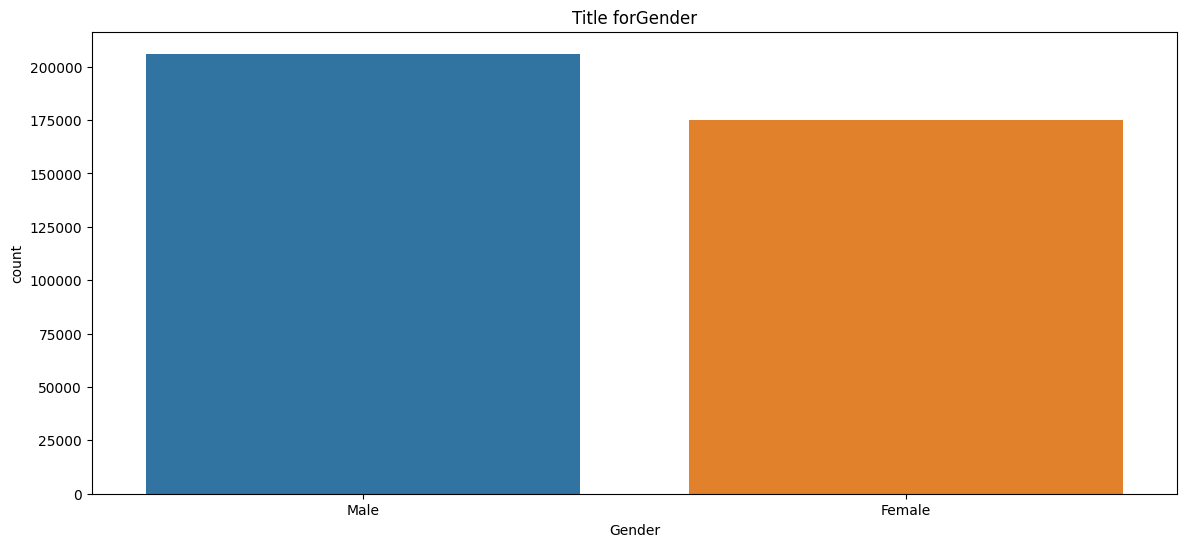

In [38]:
cat_plot('Gender')

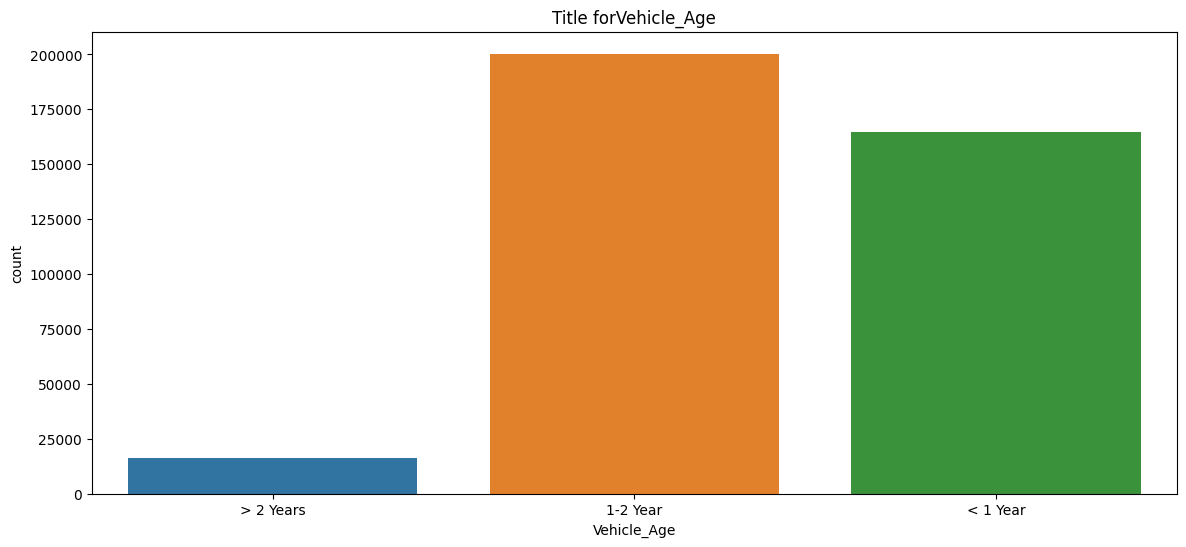

In [39]:
cat_plot('Vehicle_Age')

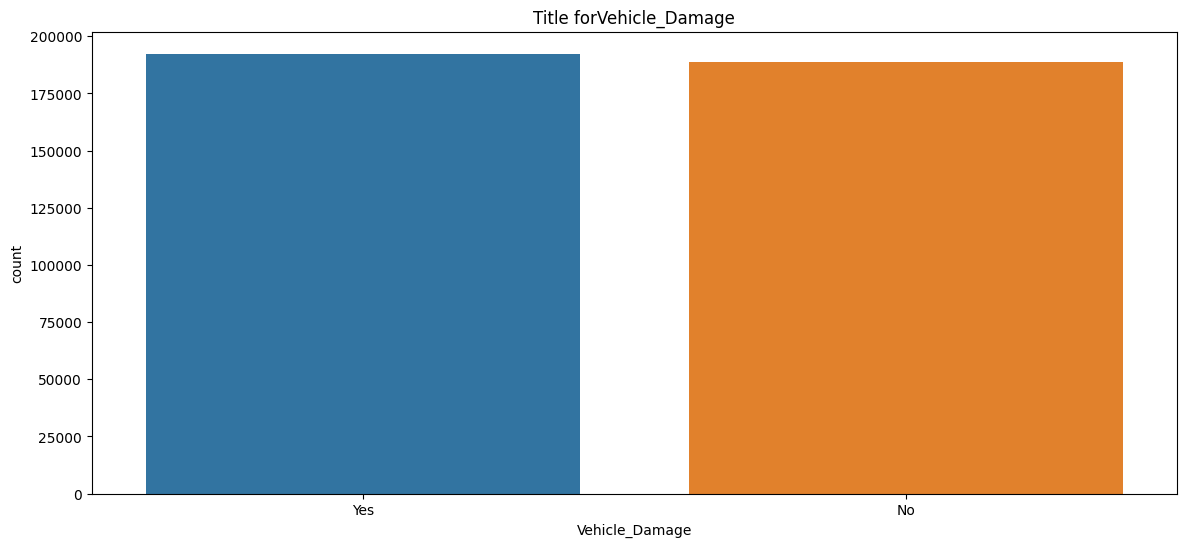

In [40]:
cat_plot('Vehicle_Damage')

In [41]:
def num_plot():
    for col in df.select_dtypes(include=np.number):
        print('Min:',df[col].min())
        print('Max:',df[col].max())
        print('Mean:',df[col].mean())
        plt.figure(figsize=(16,7))
        plt.title('Title for'+col)
        sns.distplot(df[col],color='g')
        plt.show()

Min: 1
Max: 381109
Mean: 190555.0


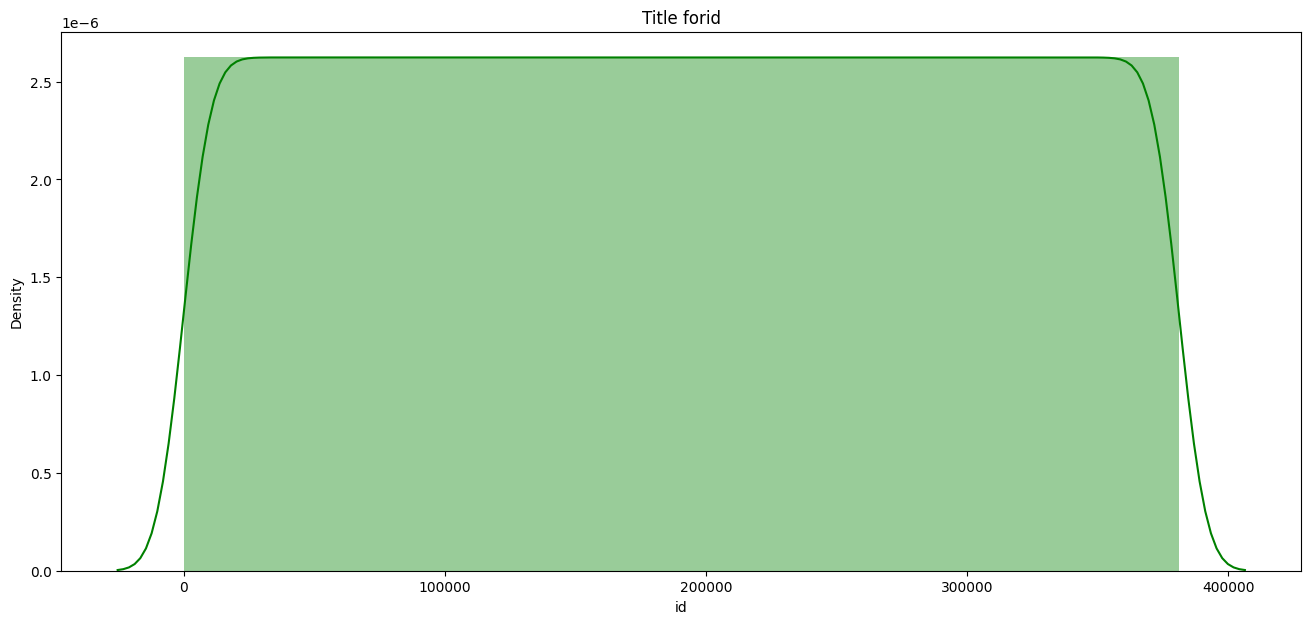

Min: 20
Max: 85
Mean: 38.822583565331705


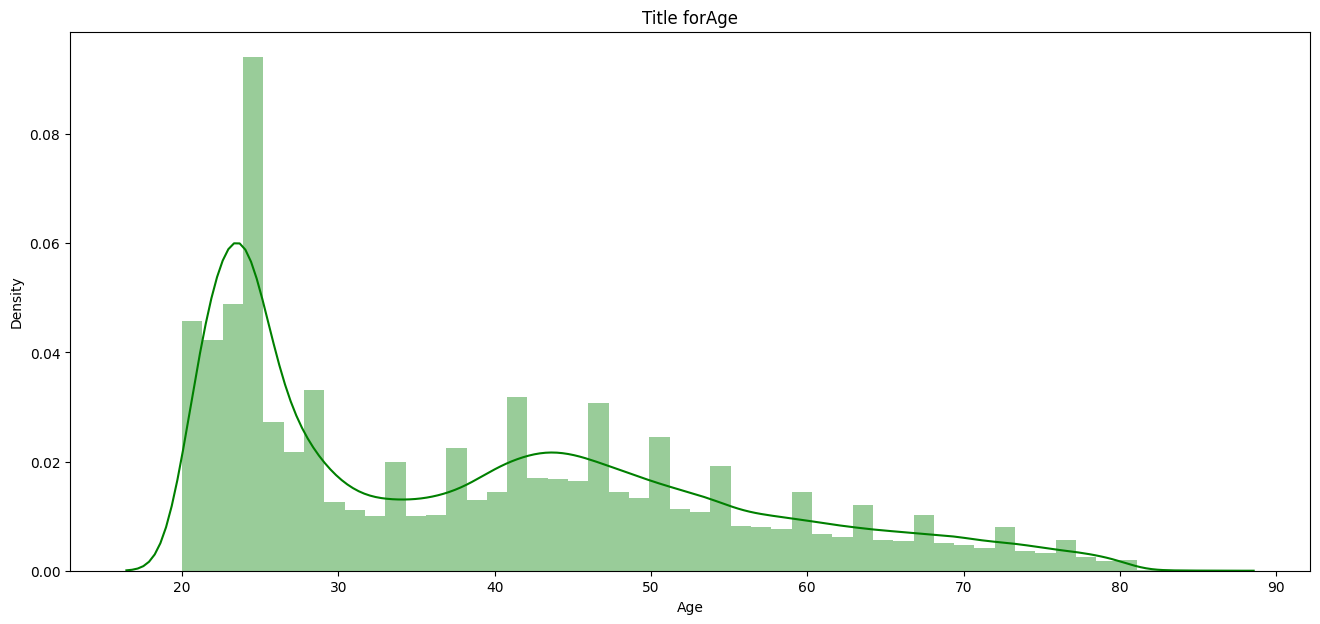

Min: 0
Max: 1
Mean: 0.9978693759528114


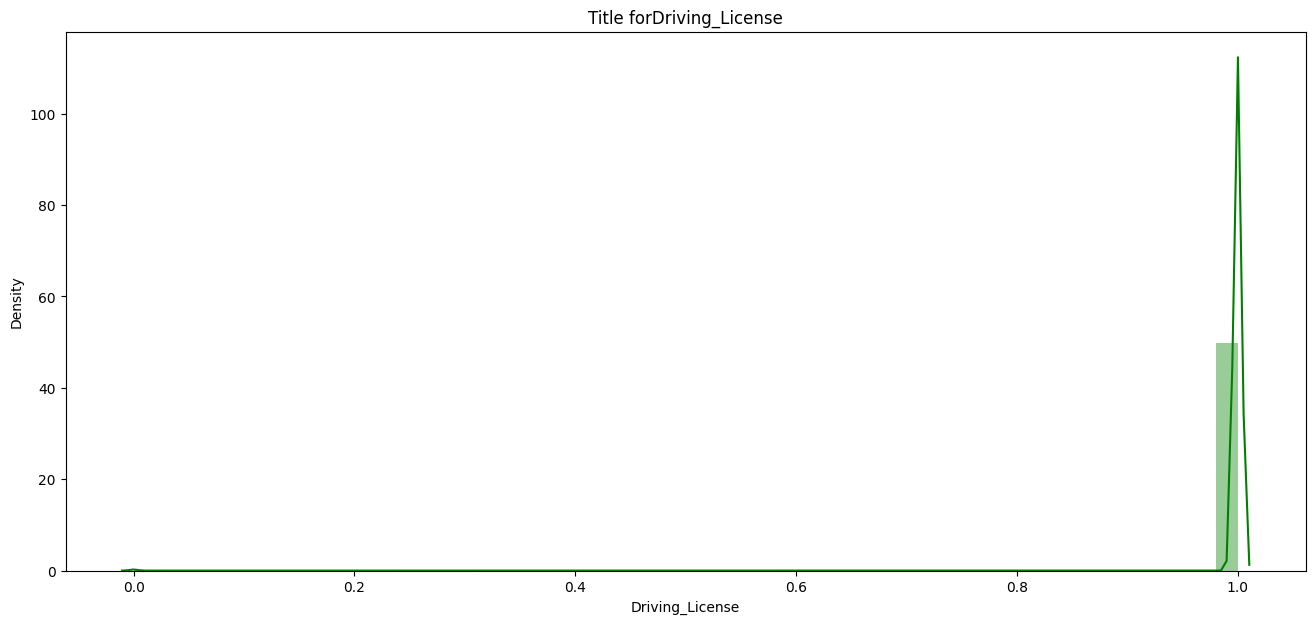

Min: 0.0
Max: 52.0
Mean: 26.388807401557035


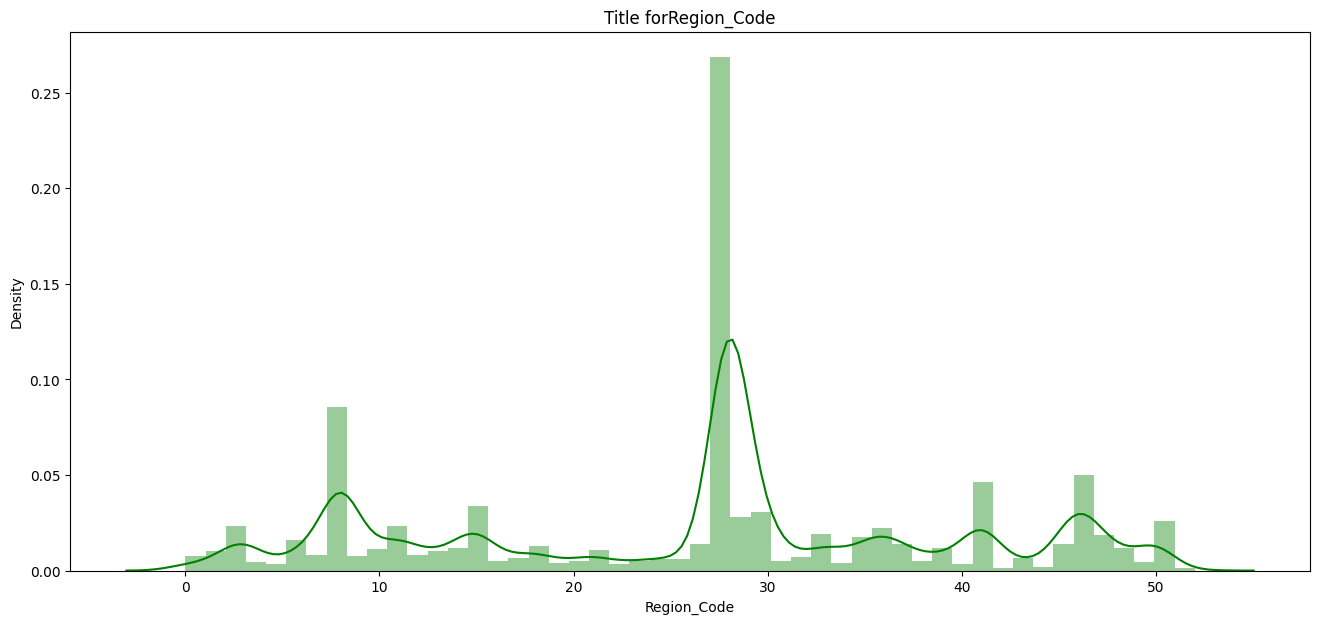

Min: 0
Max: 1
Mean: 0.4582101183650871


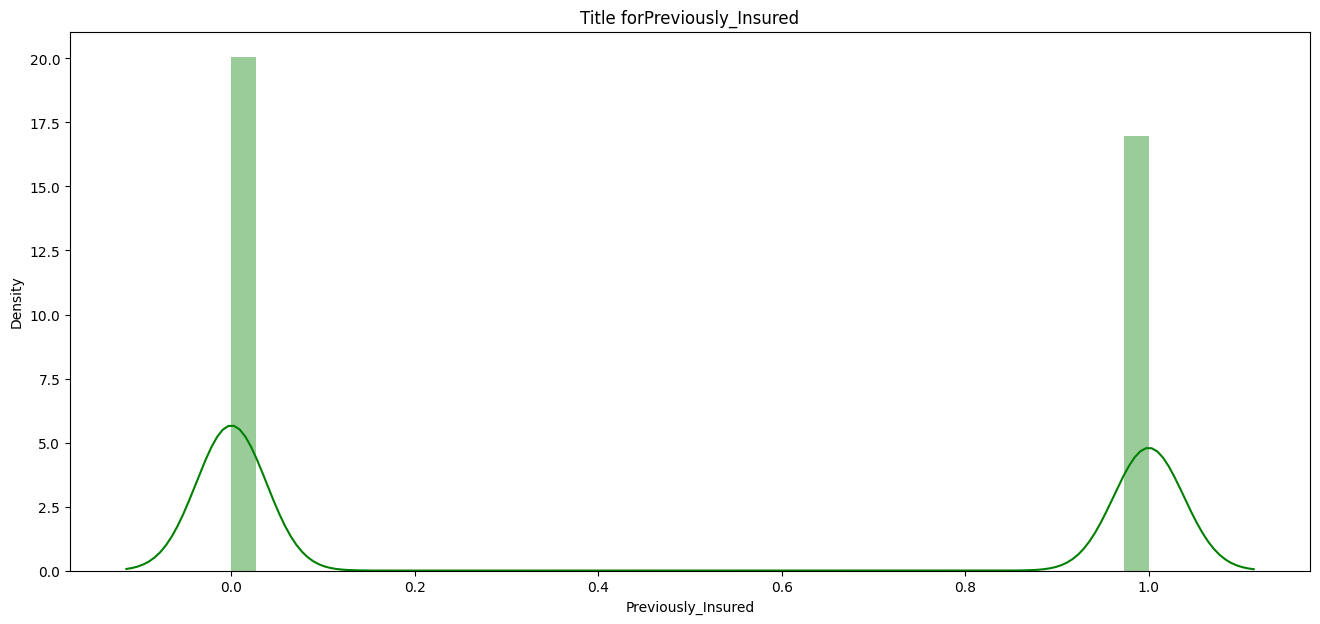

Min: 2630.0
Max: 540165.0
Mean: 30564.389581458323


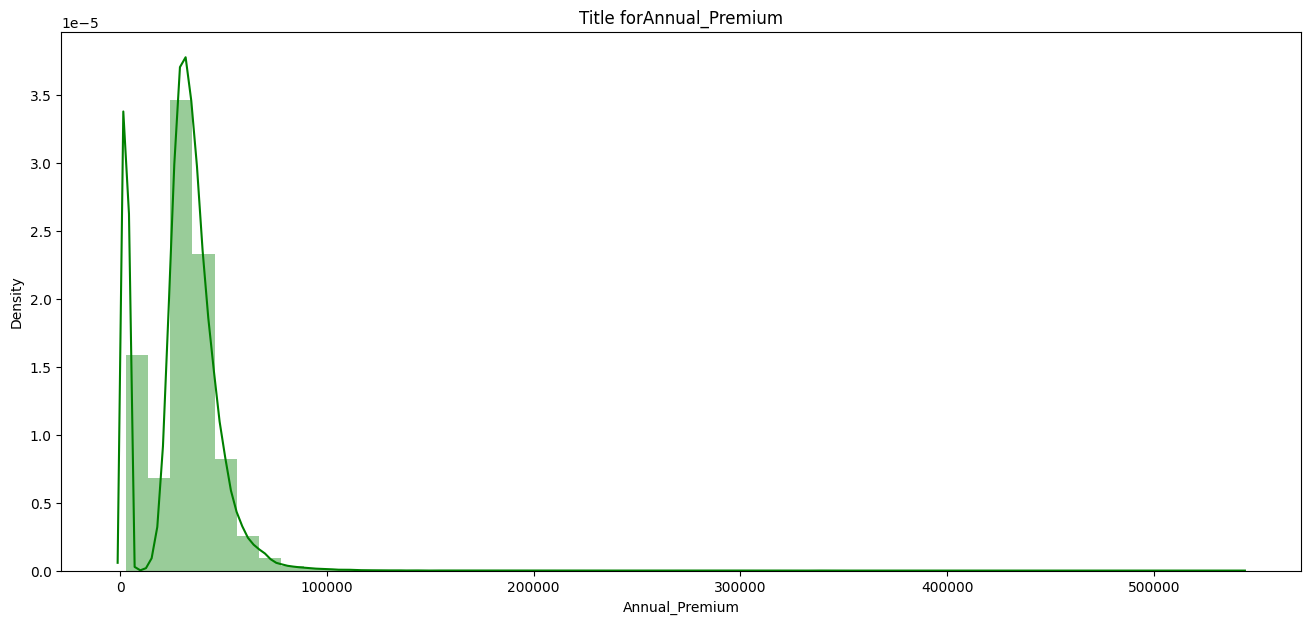

Min: 1.0
Max: 163.0
Mean: 112.03429465061177


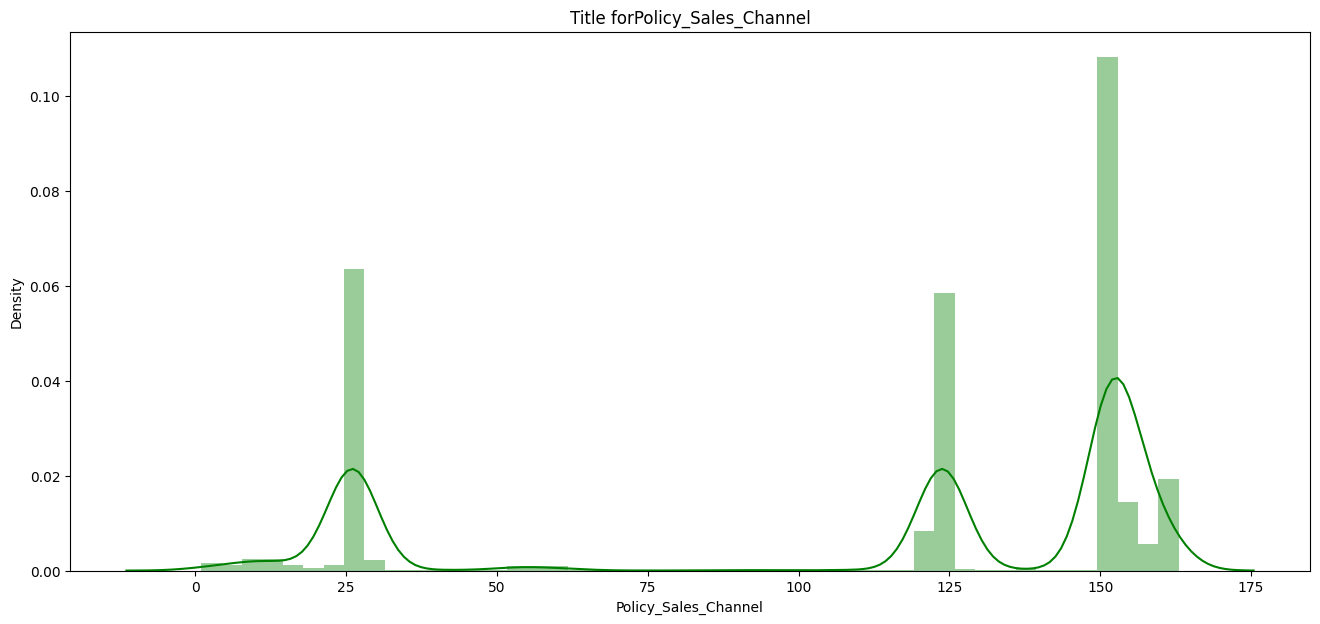

Min: 10
Max: 299
Mean: 154.34739667654136


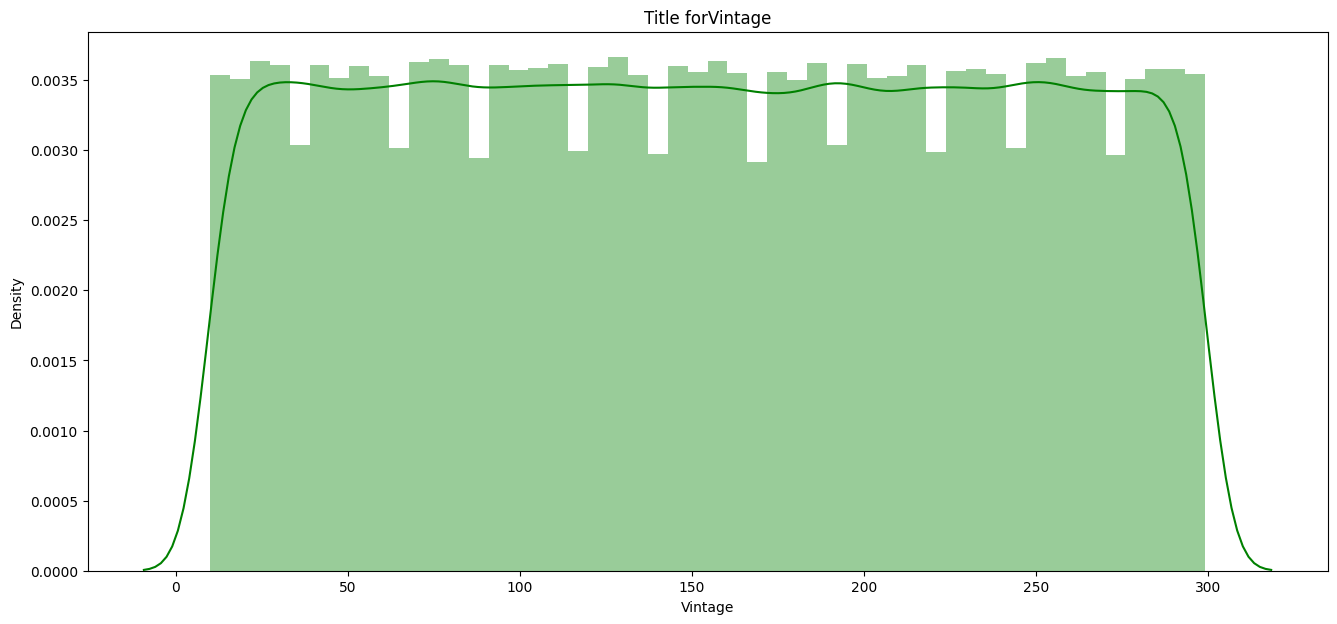

Min: 0
Max: 1
Mean: 0.12256336113815208


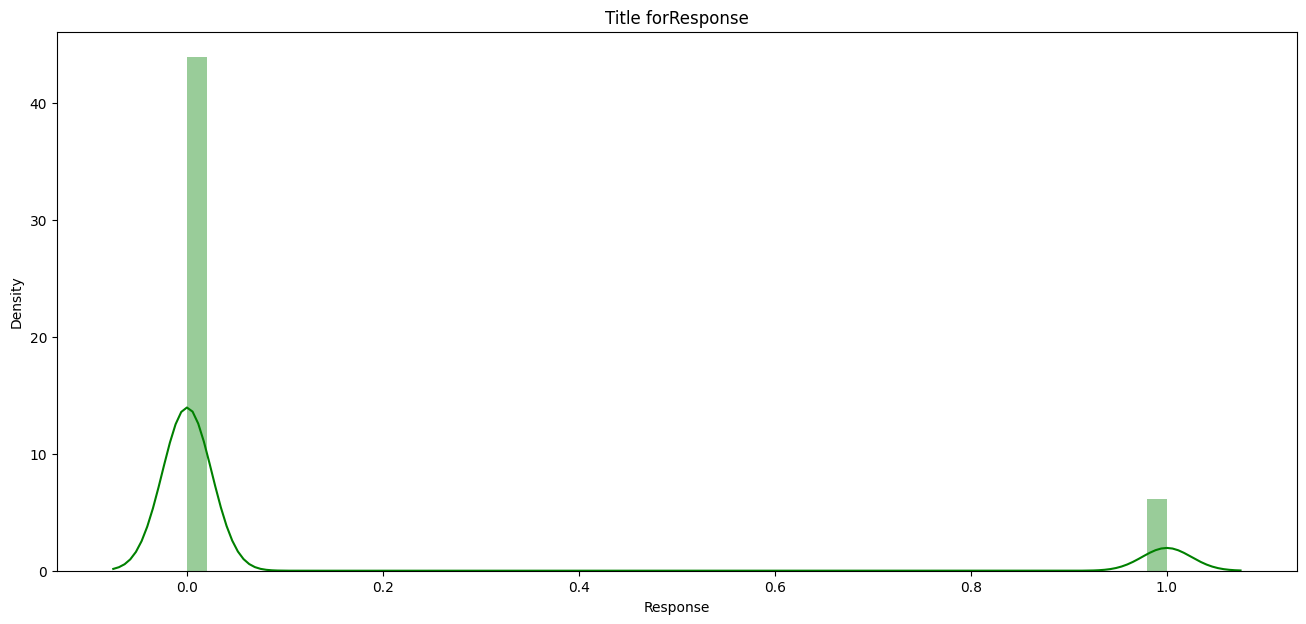

In [42]:
num_plot()

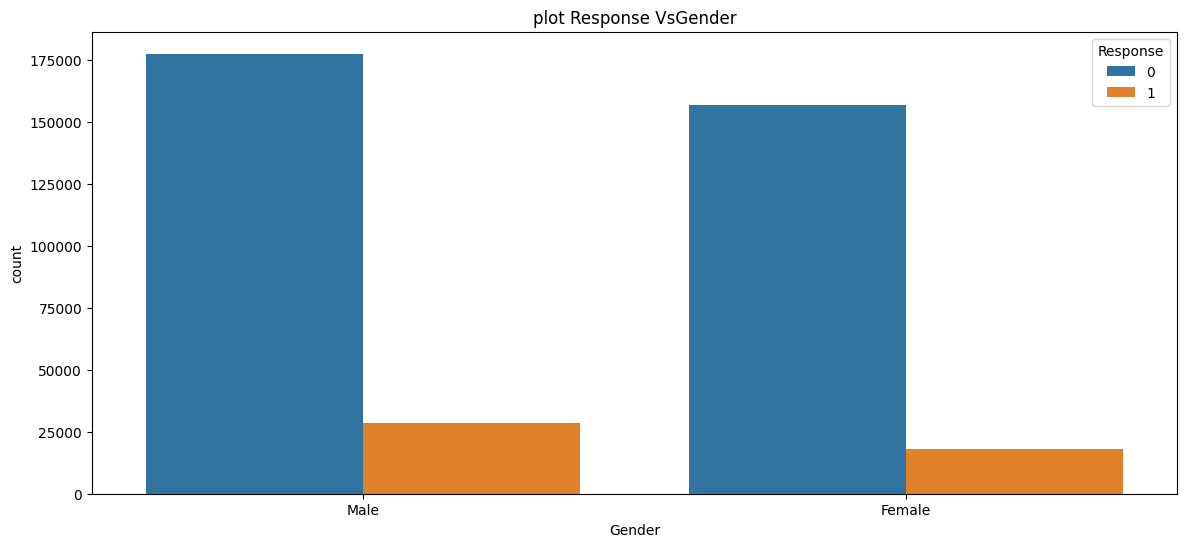

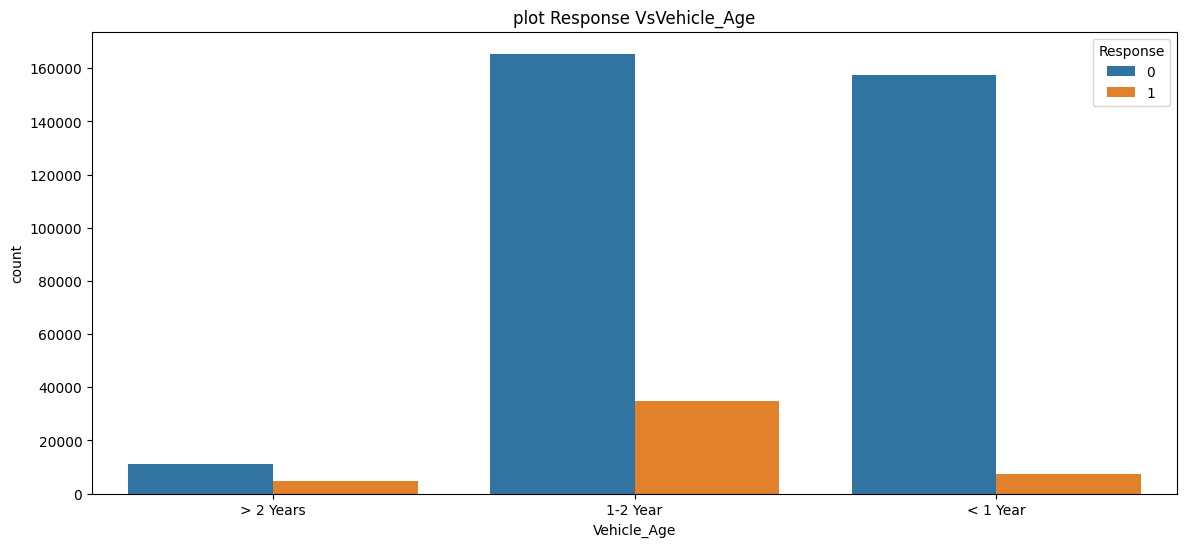

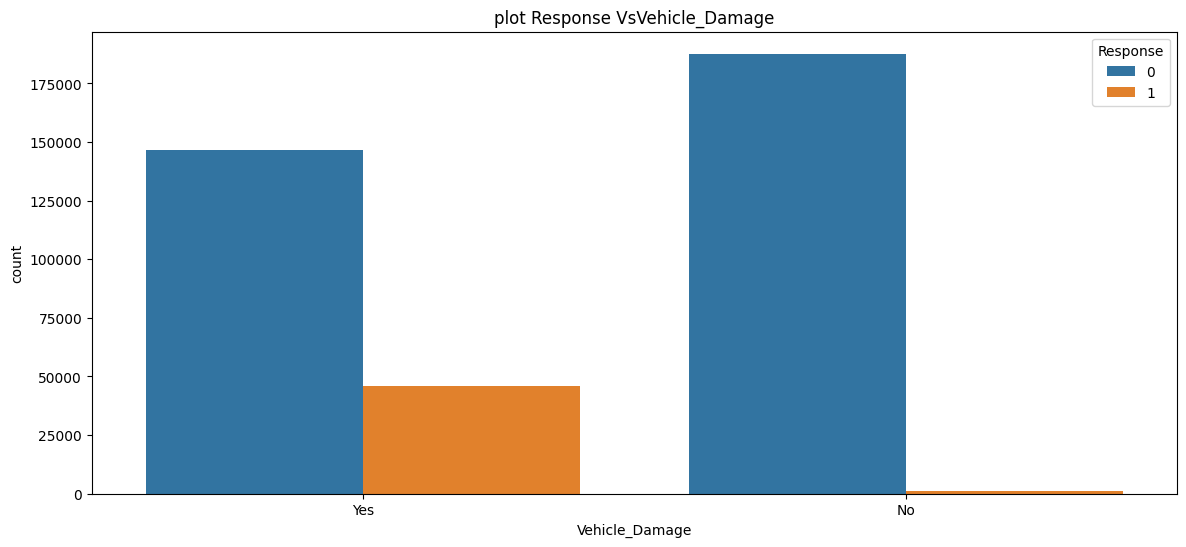

In [43]:
cols=['Gender','Vehicle_Age','Vehicle_Damage']
for i in cols:
    plt.figure(figsize=(14,6))
    plt.title('plot Response Vs'+i)
    sns.countplot(data=df, x=i, hue='Response')
    plt.show()
    print()

In [44]:
from sklearn.preprocessing import LabelBinarizer,LabelEncoder

In [45]:
cat_df=df.select_dtypes(exclude=np.number)

In [46]:
cat_df.columns

Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')

In [47]:
lb=LabelEncoder()
lb.fit_transform(np.array(df['Vehicle_Age']).reshape(-1,1))

array([2, 0, 2, ..., 1, 2, 0])

In [48]:
for i in cat_df.columns:
    df[i] = lb.fit_transform(np.array(df[i]).reshape(-1,1))

In [49]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  int32  
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  int32  
 7   Vehicle_Damage        381109 non-null  int32  
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int32(3), int64(6)
memory usage: 30.5 MB


In [51]:
df.to_csv('clean_train.csv',index=False)

In [52]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, cross_validate

In [79]:
df = pd.read_csv('C:\\Users\\gsric\\OneDrive\\Desktop\\clean_train.csv') 
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,2,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
1,4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
2,5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0
3,6,0,24,1,33.0,0,1,1,2630.0,160.0,176,0
4,7,1,23,1,11.0,0,1,1,23367.0,152.0,249,0


In [80]:
df = shuffle(df)

In [81]:
df.shape

(100000, 12)

In [82]:
x = df.drop(['id', 'Response'], axis=1)
y=df['Response']

In [83]:
x_train,x_test,y_train,y_test=train_test_split(x,y, random_state=100, test_size=0.2)

In [84]:
x_train. shape

(80000, 10)

In [85]:
y_train.shape

(80000,)

In [86]:
x_test.shape

(20000, 10)

In [87]:
y_test.shape

(20000,)

In [88]:
lr = LogisticRegression() 
lr.fit(x_train,y_train)
#Lr_pred Lr.predict(x_test)
print('Trian acc:', accuracy_score (y_train, lr.predict(x_train))) 
print('Test acc:',accuracy_score(y_test,lr.predict(x_test)))

Trian acc: 0.589
Test acc: 0.59025


In [89]:
params = {
'penalty':["l1", "l2"],
'C': [0.0001, 0.001,0.01, 0.1,1.0,10,100]
}

In [90]:
grid_lr = RandomizedSearchCV(lr,param_distributions=params,n_jobs=-1,cv=3, scoring='accuracy') 
grid_lr.fit(x_train,y_train)

RandomizedSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10,
                                              100],
                                        'penalty': ['l1', 'l2']},
                   scoring='accuracy')

In [91]:
grid_lr.best_params_

{'penalty': 'l2', 'C': 0.01}

In [92]:
f_lr = LogisticRegression (penalty="l2",C=1.0) 
f_lr.fit(x_train,y_train)

LogisticRegression()

In [93]:
y_pred = f_lr.predict(x_test)

In [94]:
print('Train score:', accuracy_score (y_train,f_lr.predict(x_train)))
print("Test score:", accuracy_score(y_test,y_pred))

Train score: 0.589
Test score: 0.59025


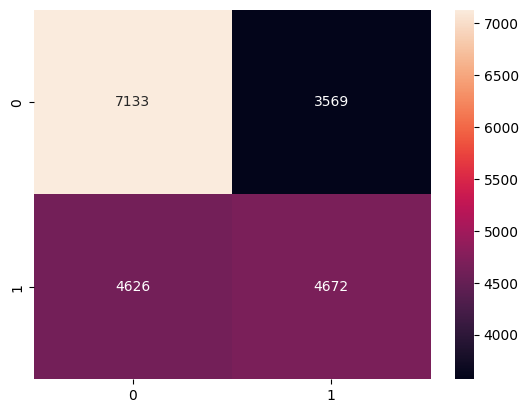

In [95]:
cm = confusion_matrix(y_test,y_pred)
cm = pd.DataFrame(data=cm, columns=[0,1], index=[0,1]) 
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [96]:
f1_score (y_test,y_pred)

0.5327555732938024

In [103]:
np.array(x_test)[1]

array([1.0000e+00, 5.4000e+01, 1.0000e+00, 2.0000e+00, 0.0000e+00,
       2.0000e+00, 1.0000e+00, 3.5459e+04, 2.6000e+01, 4.0000e+01])

In [104]:
f_lr.predict(np.array(x_test) [1].reshape(1,-1))[0]

1

In [106]:
np.array(y_test)[1]

1